In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import fft
from scipy.io import loadmat as loadmat

In [2]:
def ifft(kspace):
    return fft.ifftshift(fft.ifft2(kspace))

In [3]:
def plot_ifft(matfile, filter_=None, title=None, ave=False):

    try:
        kspace = loadmat(matfile)["data_ave"]
    except:
        kspace = loadmat(matfile)["data"]

    if ave:
        # Drop the first scan, has artifact
        kspace = np.mean(kspace[:, :, 1:], axis=2)
    
    if filter_ is not None:
        kspace = kspace * filter_
    
    fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True)
    ax[0].imshow(np.abs(kspace), cmap="jet")
    ax[1].imshow(np.abs(ifft(kspace)), cmap="jet")
    ax[0].set_title(matfile if title is None else title)
    for ax_ in ax:
        ax_.set(xticks=[0, kspace.shape[0] - 1], yticks=[0, kspace.shape[0] - 1])
    plt.show()

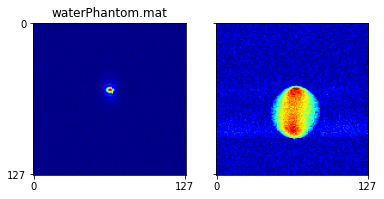

In [4]:
# 3.1
plot_ifft("waterPhantom.mat")

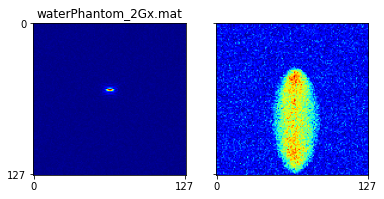

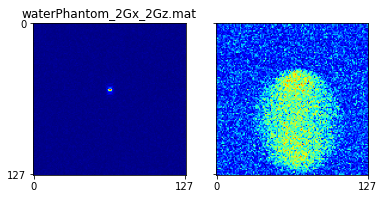

In [5]:
# 3.2
plot_ifft("waterPhantom_2Gx.mat")
plot_ifft("waterPhantom_2Gx_2Gz.mat")

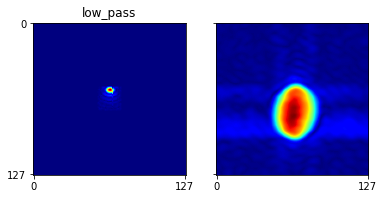

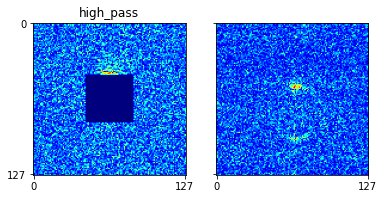

In [6]:
# 4.1 - low-pass
filter_shape = (128, 128)
low_pass = np.zeros(filter_shape)
low_pass[54:74, 54:74] = 1

plot_ifft("waterPhantom.mat", filter_=low_pass, title="low_pass")

# 4.1 - high-pass
filter_shape = (128, 128)
high_pass = np.ones(filter_shape)
high_pass[44:84, 44:84] = 0

plot_ifft("waterPhantom.mat", filter_=high_pass, title="high_pass")

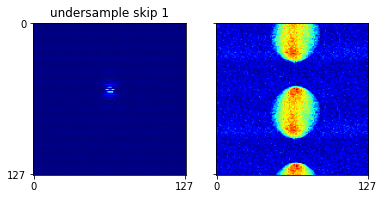

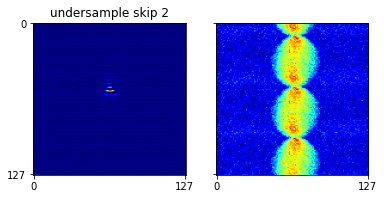

In [7]:
# 4.2 - undersampling
undersample = np.zeros(filter_shape)
undersample[::2, ::] = 1
plot_ifft("waterPhantom.mat", filter_=undersample, title="undersample skip 1")

undersample = np.zeros(filter_shape)
undersample[::3, ::] = 1
plot_ifft("waterPhantom.mat", filter_=undersample, title="undersample skip 2")

## 5: Turbo Spin Echo

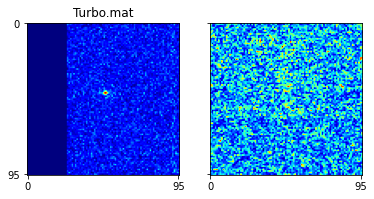

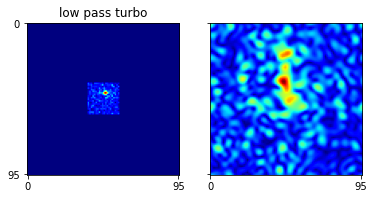

In [8]:
# Averaged image is very noisy
plot_ifft("Turbo.mat", ave=True)

# Low pass doesn't really help either
filter_shape = (96, 96)
low_pass = np.zeros(filter_shape)
freq = 10
low_pass[48 - freq : 48 + freq, 48 - freq : 48 + freq] = 1

plot_ifft("Turbo.mat", ave=True, filter_=low_pass, title="low pass turbo")

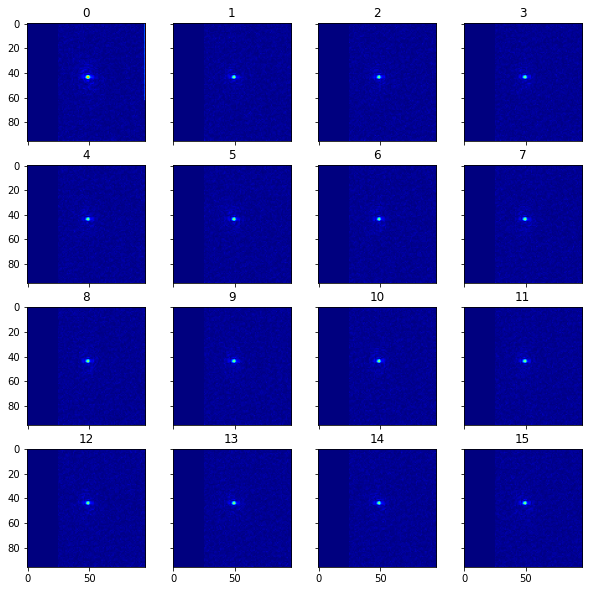

In [9]:
kspace = loadmat("Turbo.mat")["data"]

fig, ax = plt.subplots(ncols=4, nrows=4, sharex=True, sharey=True, figsize=(10, 10))
for idx, ax_ in enumerate(ax.flatten()):
    ax_.imshow(np.abs(kspace[:, :, idx]), cmap="jet", vmax=np.max(np.abs(kspace)))
    ax_.set(title=idx)
plt.show()

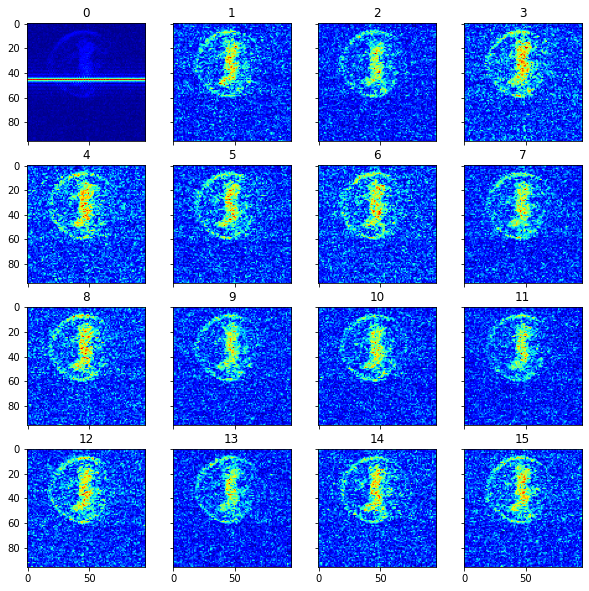

In [10]:
fig, ax = plt.subplots(ncols=4, nrows=4, sharex=True, sharey=True, figsize=(10, 10))
for idx, ax_ in enumerate(ax.flatten()):
    ax_.imshow(np.abs(ifft(kspace[:, :, idx])), cmap="jet")
    ax_.set(title=idx)
plt.show()